In [1]:
# imports 
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


import re
#and visualization setup
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
path = path = '/Users/desislavamarvakov/Study/HIT/שנה ב׳/סמסטר ב׳/Data Science/Final Project/Code/clean_outcome_intake.csv'
df = pd.read_csv(path)
df.drop(columns = ['Unnamed: 0','sex_upon_outcome','outcome_type','age_upon_outcome','age_upon_outcome_(days)','age_upon_outcome_(years)','age_upon_outcome_age_group','age_upon_intake_age_group'], inplace = True)
df.head()

,animal_id_outcome,age_upon_intake,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),time_in_shelter_days
0,A006100,10 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,3650,10.0,0.588194
1,A006100,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,2555,7.0,1.259722
2,A006100,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,2190,6.0,1.113889
3,A047759,10 years,A047759,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,3650,10.0,4.970139
4,A134067,16 years,A134067,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,5840,16.0,0.119444


count    74870.000000
mean         2.163975
std          2.960540
min          0.000000
25%          0.164384
50%          1.000000
75%          3.000000
max         22.000000
Name: age_upon_intake_(years), dtype: float64

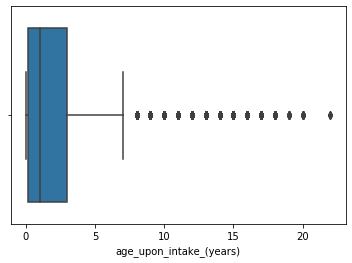

In [3]:
sns.boxplot(df['age_upon_intake_(years)'])
df['age_upon_intake_(years)'].describe()

count    74870.000000
mean        17.549818
std         42.602655
min          0.000000
25%          1.788889
50%          5.136806
75%         14.715451
max       1606.194444
Name: time_in_shelter_days, dtype: float64

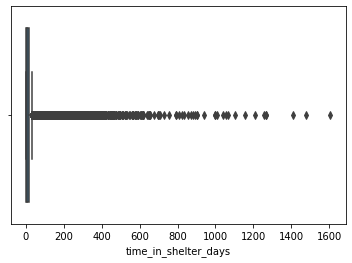

In [4]:
sns.boxplot(df['time_in_shelter_days'])
df['time_in_shelter_days'].describe()

In [5]:
pd.unique(df['sex_upon_intake'])

array(['Neutered Male', 'Spayed Female', 'Intact Female', 'Intact Male',
       'Unknown'], dtype=object)

In [6]:
#Mix 0, pure 1
def breedType(x):
    if bool(re.search('/', x)):
        return 0
    elif bool(re.search('Mix', x)):
        return 0
    else:
        return 1

In [7]:
#Mix 0, pure 1
def colorPurity(x):
    if bool(re.search('/', x)):
        return 0
    elif bool(re.search('Tricolor', x)):
        return 0
    else:
        return 1

In [8]:
#male 0, female 1, unknown 2
def Gender(x):
    if bool(re.search('Male', x)):
        return 0
    elif bool(re.search('Female', x)):
        return 1
    else:
        return 2

In [9]:
def age_group(age):
    if age < 1: group = 'puppy_kitten'
    elif age < 3: group = 'young'
    elif age < 6: group = 'adult'
    else: group = 'old'
    return group

In [10]:
#0 for cats, 1 for dogs
def AnimalType(x):
    if bool(re.search('Dog', x)):
        return 1
    else:
        return 0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74870 entries, 0 to 74869
Data columns (total 12 columns):
animal_id_outcome          74870 non-null object
age_upon_intake            74870 non-null object
animal_id_intake           74870 non-null object
animal_type                74870 non-null object
breed                      74870 non-null object
color                      74870 non-null object
intake_condition           74870 non-null object
intake_type                74870 non-null object
sex_upon_intake            74870 non-null object
age_upon_intake_(days)     74870 non-null int64
age_upon_intake_(years)    74870 non-null float64
time_in_shelter_days       74870 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 6.9+ MB


In [12]:
df.breed = df.breed.apply(breedType)
df.color = df.color.apply(colorPurity)
#df['age_upon_intake_(years)'] = df['age_upon_intake_(years)'].apply(age_group)
df.animal_type = df.animal_type.apply(AnimalType)
df.sex_upon_intake = df.sex_upon_intake.apply(Gender)
df.head()

,animal_id_outcome,age_upon_intake,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),time_in_shelter_days
0,A006100,10 years,A006100,1,0,0,Normal,Stray,0,3650,10.0,0.588194
1,A006100,7 years,A006100,1,0,0,Normal,Public Assist,0,2555,7.0,1.259722
2,A006100,6 years,A006100,1,0,0,Normal,Public Assist,0,2190,6.0,1.113889
3,A047759,10 years,A047759,1,1,0,Normal,Owner Surrender,0,3650,10.0,4.970139
4,A134067,16 years,A134067,1,1,0,Injured,Public Assist,0,5840,16.0,0.119444


In [13]:
df.describe()

,animal_type,breed,color,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),time_in_shelter_days
count,74870.000000,74870.000000,74870.000000,74870.000000,74870.000000,74870.000000,74870.000000
mean,0.605717,0.051449,0.439989,0.536330,789.850928,2.163975,17.549818
std,0.488699,0.220914,0.496389,0.569176,1080.596953,2.960540,42.602655
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,60.000000,0.164384,1.788889
50%,1.000000,0.000000,0.000000,0.000000,365.000000,1.000000,5.136806
75%,1.000000,0.000000,1.000000,1.000000,1095.000000,3.000000,14.715451
max,1.000000,1.000000,1.000000,2.000000,8030.000000,22.000000,1606.194444


In [14]:
df[(df['time_in_shelter_days']<100)&(df['age_upon_intake_(years)']<2.0)&(df['time_in_shelter_days']>2)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32076 entries, 1215 to 74858
Data columns (total 12 columns):
animal_id_outcome          32076 non-null object
age_upon_intake            32076 non-null object
animal_id_intake           32076 non-null object
animal_type                32076 non-null int64
breed                      32076 non-null int64
color                      32076 non-null int64
intake_condition           32076 non-null object
intake_type                32076 non-null object
sex_upon_intake            32076 non-null int64
age_upon_intake_(days)     32076 non-null int64
age_upon_intake_(years)    32076 non-null float64
time_in_shelter_days       32076 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 3.2+ MB


In [15]:
# def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = 'purple', yscale_log=False):

#     # Create the plot object
#     _, ax = plt.subplots()

#     # Plot the data, set the size (s), color and transparency (alpha)
#     # of the points
#     ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

#     if yscale_log == True:
#         ax.set_yscale('log')

#     # Label the axes and provide a title
#     ax.set_title(title)
#     ax.set_xlabel(x_label)
#     ax.set_ylabel(y_label)

In [16]:
# df.apply(scatterplot(df['age_upon_intake_(years)'],df['time_in_shelter_days'],'Age upon intake','Time in shelter (days)','t'))

In [17]:
pd.unique(df['intake_type'])

array(['Stray', 'Public Assist', 'Owner Surrender', 'Euthanasia Request'],
      dtype=object)

In [18]:
pd.unique(df['intake_condition'])

array(['Normal', 'Injured', 'Aged', 'Sick', 'Other', 'Feral', 'Pregnant',
       'Nursing'], dtype=object)

In [19]:
#checking the validity of the data
df[df['animal_id_outcome']!=df['animal_id_intake']]

,animal_id_outcome,age_upon_intake,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),time_in_shelter_days


In [20]:

df.drop(columns = ['animal_id_outcome','age_upon_intake_(days)','age_upon_intake'],inplace=True)
#df.drop(columns = ['animal_id_outcome','age_upon_intake_(days)','age_upon_intake','intake_condition'],inplace=True)

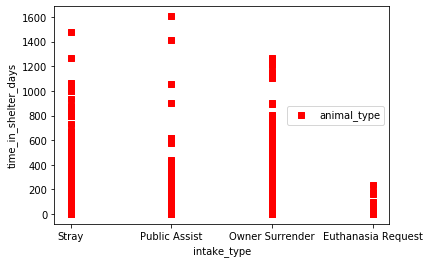

In [21]:
plt.scatter(x=df['intake_type'],y=df['time_in_shelter_days'],c='r',marker='s',label='animal_type')
# plt.scatter(x=df['age_upon_intake_(years)'],y=df['time_in_shelter_days'],c='b',marker='o',label='age_upon_intake')
# plt.scatter(x=df['intake_condition'],y=df['time_in_shelter_days'],c='k',marker='*',label='intake_condition')

plt.legend(numpoints=1,loc=5)
plt.xlabel('intake_type')
plt.ylabel('time_in_shelter_days')
plt.show()

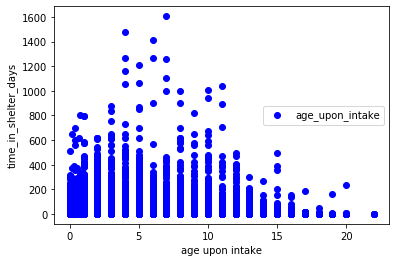

In [22]:
plt.scatter(x=df['age_upon_intake_(years)'],y=df['time_in_shelter_days'],c='b',marker='o',label='age_upon_intake')

plt.legend(numpoints=1,loc=5)
plt.xlabel('age upon intake')
plt.ylabel('time_in_shelter_days')
plt.show()

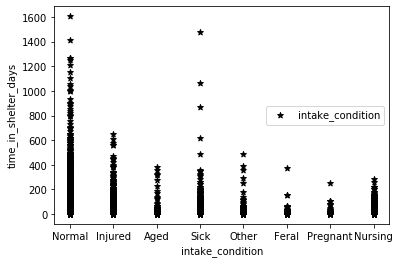

In [23]:
plt.scatter(x=df['intake_condition'],y=df['time_in_shelter_days'],c='k',marker='*',label='intake_condition')

plt.legend(numpoints=1,loc=5)
plt.xlabel('intake_condition')
plt.ylabel('time_in_shelter_days')
plt.show()

In [24]:
df = pd.get_dummies(df, columns=['intake_type'])
df

,animal_id_intake,animal_type,breed,color,intake_condition,sex_upon_intake,age_upon_intake_(years),time_in_shelter_days,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray
0,A006100,1,0,0,Normal,0,10.000000,0.588194,0,0,0,1
1,A006100,1,0,0,Normal,0,7.000000,1.259722,0,0,1,0
2,A006100,1,0,0,Normal,0,6.000000,1.113889,0,0,1,0
3,A047759,1,1,0,Normal,0,10.000000,4.970139,0,1,0,0
4,A134067,1,1,0,Injured,0,16.000000,0.119444,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74865,A769058,0,0,1,Normal,2,0.038356,0.076389,0,0,0,1
74866,A769059,0,0,1,Normal,2,0.038356,0.708333,0,0,0,1
74867,A769060,0,0,1,Normal,2,0.038356,0.077083,0,0,0,1
74868,A769066,1,0,0,Normal,0,0.410959,1.762500,0,0,0,1


We decided to drop the "intake condition" column because we don't think it would benefit the model.
if the accuracy won't be high, we will try it again by including this column

In [25]:
df.drop(columns=['intake_condition'],inplace = True)
#df.drop(columns=['intake_type'],inplace = True)

In [26]:
df_ID = df['animal_id_intake']
df.drop(columns=['animal_id_intake'],inplace = True)
TRAINING_FEATURES = df[df.columns.difference(['time_in_shelter_days'])]

TARGET_FEATURE    = 'time_in_shelter_days'

X = TRAINING_FEATURES
y = df[TARGET_FEATURE]
# X.info()
df

,animal_type,breed,color,sex_upon_intake,age_upon_intake_(years),time_in_shelter_days,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray
0,1,0,0,0,10.000000,0.588194,0,0,0,1
1,1,0,0,0,7.000000,1.259722,0,0,1,0
2,1,0,0,0,6.000000,1.113889,0,0,1,0
3,1,1,0,0,10.000000,4.970139,0,1,0,0
4,1,1,0,0,16.000000,0.119444,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
74865,0,0,1,2,0.038356,0.076389,0,0,0,1
74866,0,0,1,2,0.038356,0.708333,0,0,0,1
74867,0,0,1,2,0.038356,0.077083,0,0,0,1
74868,1,0,0,0,0.410959,1.762500,0,0,0,1


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape))
print("Number of training samples: #{}".format(X_train.shape))
print("Number of test samples: #{}".format(X_test.shape))

print("\nTarget distribution in original dataset:\n{}".format(y.value_counts()))
print("\nTarget distribution in the training set:\n{}\n".format(y_train.value_counts()))
print("Target distribution in the test set:\n{}".format(y_test.value_counts()))

Initial amount of samples: #(74870, 9)
Number of training samples: #(59896, 9)
Number of test samples: #(14974, 9)

Target distribution in original dataset:
0.085417     54
0.054861     54
0.068750     54
0.063889     53
0.079861     52
             ..
43.061806     1
62.021528     1
16.349306     1
28.275694     1
16.265972     1
Name: time_in_shelter_days, Length: 28877, dtype: int64

Target distribution in the training set:
0.068750     45
0.079861     45
0.054167     44
0.054861     43
0.070833     43
             ..
7.236111      1
96.925694     1
92.138194     1
59.157639     1
10.267361     1
Name: time_in_shelter_days, Length: 25207, dtype: int64

Target distribution in the test set:
0.044444     15
0.063889     15
0.034028     15
0.043056     14
0.042361     13
             ..
14.027778     1
3.072917      1
0.313194      1
15.865972     1
13.008333     1
Name: time_in_shelter_days, Length: 9949, dtype: int64


In [28]:
model = linear_model.LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_pred = model.predict(X_test)

In [31]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [  0.58984801  -5.72888672  -3.5213699   -2.57923031 -11.51727118
   7.46765123   2.11671228   1.93290767  -2.04109031]
Intercept: 19.183744938226955
Mean squared error (MSE): 1787.83
Coefficient of determination (R^2): 0.01


In [32]:
r2_score(y_test, y_pred)

0.009236976425076038

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_trained_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
scaler.mean_

array([2.16223577, 0.60620075, 0.0513056 , 0.43894417, 0.00292173,
       0.1952885 , 0.06437826, 0.73741151, 0.53531121])

In [35]:
scaler.scale_

array([2.95998144, 0.48859124, 0.22062033, 0.49625818, 0.05397402,
       0.39642263, 0.24542554, 0.44004065, 0.56945943])

In [36]:
X_trained_scaled = pd.DataFrame(X_trained_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [37]:
np.round(X_trained_scaled.describe(),2)

,age_upon_intake_(years),animal_type,breed,color,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,sex_upon_intake
count,59896.00,59896.00,59896.00,59896.00,59896.00,59896.00,59896.00,59896.00,59896.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.73,-1.24,-0.23,-0.88,-0.05,-0.49,-0.26,-1.68,-0.94
25%,-0.67,-1.24,-0.23,-0.88,-0.05,-0.49,-0.26,-1.68,-0.94
50%,-0.39,0.81,-0.23,-0.88,-0.05,-0.49,-0.26,0.60,-0.94
75%,0.28,0.81,-0.23,1.13,-0.05,-0.49,-0.26,0.60,0.82
max,6.70,0.81,4.30,1.13,18.47,2.03,3.81,0.60,2.57


In [38]:
model_scaled = LinearRegression().fit(X_trained_scaled, y_train)

In [39]:
print('Coefficients:', model_scaled.coef_)
print('Intercept:', model_scaled.intercept_)
print('model score is',model_scaled.score(X_trained_scaled,y_train))

Coefficients: [ 1.74593917 -2.79908387 -0.77688581 -1.27996415 -0.83570908  1.38802554
 -0.45392946 -0.89476343 -1.16231812]
Intercept: 17.56717204497489
model score is 0.00865652410585116


In [40]:
y_pred_scaled = model_scaled.predict(X_test_scaled)

In [41]:
y_pred_scaled

array([18.06545968, 12.5369893 , 16.90348183, ..., 18.58590295,
       17.15730993, 19.12382243])

In [42]:
print('mean squared error on scaled data is ', np.round(mean_squared_error(y_pred_scaled, y_test)),2)
print('r squared on scaled data is ', r2_score(y_pred_scaled, y_test))

mean squared error on scaled data is  1788.0 2
r squared on scaled data is  -111.79657869887255
